In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium.plugins import FloatImage

In [2]:
school_districts = gpd.read_file('../data/school_districts.geojson')
school_districts

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ..."
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,"MULTIPOLYGON (((-86.76696 36.08333, -86.76590 ..."
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,"MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ..."
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,"MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ..."
5,Mary,Nashville,37215,mary@pierceforschools.org,TN,Pierce,4329 Wallace Lane,Member,2018,8,615-310-9772,"MULTIPOLYGON (((-86.80849 36.14744, -86.80863 ..."
6,Christine,Nashville,37203,cbuggs@mnps.org,TN,Buggs,425 Fisk Street,Member,2016,5,615-525-5371,"MULTIPOLYGON (((-86.69728 36.20414, -86.69696 ..."
7,Tyese,Antioch,37013,tyese.hunter@mnps.org,TN,Hunter,2433 Evanfield Court,Member,2018,6,615-739-8068,"MULTIPOLYGON (((-86.70559 36.09685, -86.70306 ..."
8,Will,Nashville,37204,will@pinkstonforschools.com,TN,Pinkston,937 Battlefield Drive,Member,2016,7,615-298-5787,"MULTIPOLYGON (((-86.55811 36.13984, -86.55812 ..."


In [3]:
arts_grants = pd.read_csv('../data/school_arts_grants.csv')

In [4]:
arts_grants.head()

,School Name,Category,Street Address,City,State,ZIP Code,Students,Grant Category,Organization Name,Fiscal Year,Mapped Location
0,Norman Binkley Elementary School,MNPS,4700 West Longdale Drive,Nashville,TN,37211,314.0,Basic Operating,Nashville Children's Theatre,FY16,NaN
1,Goodlettsville Middle Prep,MNPS,300 South Main Street,Goodlettsville,TN,37072,127.0,Basic Operating,Tennessee Performing Arts Center,FY16,NaN
2,Hillsboro High School,MNPS,400 Davidson Road,Nashville,TN,37205,1.0,Basic Operating,Nashville Jazz Workshop,FY16,"400 Davidson Road\nNashville, TN 37205\n(36.11..."
3,Homeschool,Home Schooled,NaN,NaN,TN,NaN,30.0,Basic Operating,Cheekwood,FY17,"TN\n(35.842998, -86.343226)"
4,John Overton High School,MNPS,4820 Franklin Road,Nashville,TN,37220,217.0,Basic Operating,Nashville Symphony,FY16,NaN


In [5]:
#extract lat/long from the Mapped Location columns
arts_grants['Location'] = arts_grants['Mapped Location'].str.split('(').str[1]

In [6]:
arts_grants['Location'] = arts_grants['Location'].str.split(')').str[0]
arts_grants['lat'] = arts_grants['Location'].str.split(',').str[0]
arts_grants['long'] = arts_grants['Location'].str.split(',').str[1]
#create geometry column
arts_grants['geometry'] = arts_grants.apply(lambda x: Point((float(x.long), 
                                                         float(x.lat))), 
                                        axis=1)
arts_grants.shape

(2533, 15)

In [7]:
#arts_grants = arts_grants.dropna()
print(arts_grants.shape)
arts_grants.head()

(2533, 15)


,School Name,Category,Street Address,City,State,ZIP Code,Students,Grant Category,Organization Name,Fiscal Year,Mapped Location,Location,lat,long,geometry
0,Norman Binkley Elementary School,MNPS,4700 West Longdale Drive,Nashville,TN,37211,314.0,Basic Operating,Nashville Children's Theatre,FY16,NaN,NaN,NaN,NaN,POINT (nan nan)
1,Goodlettsville Middle Prep,MNPS,300 South Main Street,Goodlettsville,TN,37072,127.0,Basic Operating,Tennessee Performing Arts Center,FY16,NaN,NaN,NaN,NaN,POINT (nan nan)
2,Hillsboro High School,MNPS,400 Davidson Road,Nashville,TN,37205,1.0,Basic Operating,Nashville Jazz Workshop,FY16,"400 Davidson Road\nNashville, TN 37205\n(36.11...","36.117025, -86.873648",36.117025,-86.873648,POINT (-86.873648 36.117025)
3,Homeschool,Home Schooled,NaN,NaN,TN,NaN,30.0,Basic Operating,Cheekwood,FY17,"TN\n(35.842998, -86.343226)","35.842998, -86.343226",35.842998,-86.343226,POINT (-86.343226 35.842998)
4,John Overton High School,MNPS,4820 Franklin Road,Nashville,TN,37220,217.0,Basic Operating,Nashville Symphony,FY16,NaN,NaN,NaN,NaN,POINT (nan nan)


In [8]:
school_districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
mapped_loc = arts_grants['Mapped Location'].value_counts()

In [10]:
arts_grants.isnull().sum()

School Name            0
Category               1
Street Address        49
City                  50
State                  3
ZIP Code              54
Students               2
Grant Category         0
Organization Name      0
Fiscal Year            0
Mapped Location      160
Location             160
lat                  160
long                 160
geometry               0
dtype: int64

<AxesSubplot:>

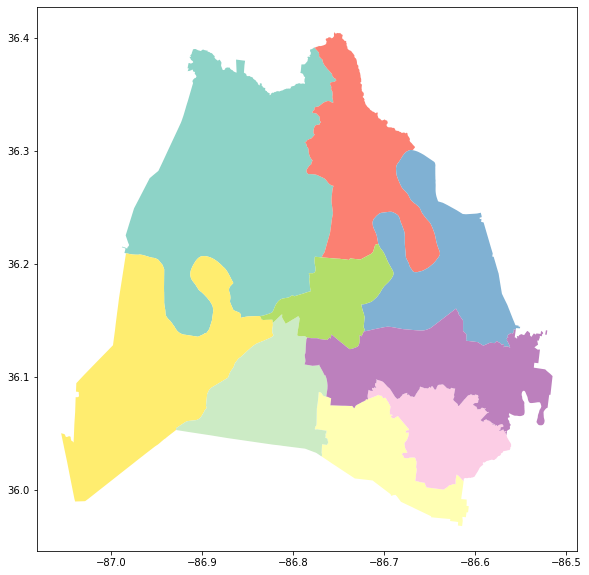

In [11]:
school_districts.plot(column = 'district', cmap = 'Set3', figsize = (10, 10))

In [12]:
#create geo dataframe
arts_grants_geo = gpd.GeoDataFrame(arts_grants, 
                           crs = school_districts.crs, 
                           geometry = arts_grants['geometry'])

In [13]:
arts_grants_geo.head()

,School Name,Category,Street Address,City,State,ZIP Code,Students,Grant Category,Organization Name,Fiscal Year,Mapped Location,Location,lat,long,geometry
0,Norman Binkley Elementary School,MNPS,4700 West Longdale Drive,Nashville,TN,37211,314.0,Basic Operating,Nashville Children's Theatre,FY16,NaN,NaN,NaN,NaN,POINT (nan nan)
1,Goodlettsville Middle Prep,MNPS,300 South Main Street,Goodlettsville,TN,37072,127.0,Basic Operating,Tennessee Performing Arts Center,FY16,NaN,NaN,NaN,NaN,POINT (nan nan)
2,Hillsboro High School,MNPS,400 Davidson Road,Nashville,TN,37205,1.0,Basic Operating,Nashville Jazz Workshop,FY16,"400 Davidson Road\nNashville, TN 37205\n(36.11...","36.117025, -86.873648",36.117025,-86.873648,POINT (-86.87365 36.11702)
3,Homeschool,Home Schooled,NaN,NaN,TN,NaN,30.0,Basic Operating,Cheekwood,FY17,"TN\n(35.842998, -86.343226)","35.842998, -86.343226",35.842998,-86.343226,POINT (-86.34323 35.84300)
4,John Overton High School,MNPS,4820 Franklin Road,Nashville,TN,37220,217.0,Basic Operating,Nashville Symphony,FY16,NaN,NaN,NaN,NaN,POINT (nan nan)


In [14]:
arts_grants_geo['Fiscal Year'].value_counts()

FY17    967
FY16    859
FY19    707
Name: Fiscal Year, dtype: int64

In [15]:
#join dataframes to sort schools by district
grants_by_district = gpd.sjoin(arts_grants_geo, school_districts, op = 'within')

In [16]:
print(grants_by_district.shape)
grants_by_district.head()

(2294, 27)


,School Name,Category,Street Address,City,State,ZIP Code,Students,Grant Category,Organization Name,Fiscal Year,...,city,zip,email,state,last_name,address,position,term_expir,district,phone
2,Hillsboro High School,MNPS,400 Davidson Road,Nashville,TN,37205,1.0,Basic Operating,Nashville Jazz Workshop,FY16,...,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650
14,Charlotte Park Elementary School,MNPS,480 Annex Avenue,Nashville,TN,37209,110.0,Basic Operating,Nashville Symphony,FY16,...,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650
17,Abintra Montessori School,Private,914 Davidson Drive,Nashville,TN,37205,50.0,Basic Operating,Tennessee Performing Arts Center,FY17,...,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650
43,Belle Meade Children's Center,Early Learning Center/Pre-K,121 Davidson Rd,Nashville,TN,37205,80.0,Basic Operating,Nashville Ballet,FY19,...,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650
46,Westminster School for Young Children,ELC/Pre-K,3900 West End Avenue,Nashville,TN,37205,228.0,Basic Operating,Global Education Center,FY19,...,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650


In [17]:
#filter down to grants in fiscal year 2019
grants_by_district_19 = grants_by_district[grants_by_district['Fiscal Year'] == 'FY19']

In [18]:
grants_by_district_19.dtypes

School Name            object
Category               object
Street Address         object
City                   object
State                  object
ZIP Code               object
Students              float64
Grant Category         object
Organization Name      object
Fiscal Year            object
Mapped Location        object
Location               object
lat                    object
long                   object
geometry             geometry
index_right             int64
first_name             object
city                   object
zip                    object
email                  object
state                  object
last_name              object
address                object
position               object
term_expir             object
district               object
phone                  object
dtype: object

In [19]:
#find out how many/types grants each school received
grants_by_district_19.groupby(["School Name", "Grant Category"], as_index=False)["Fiscal Year"].count().sort_values(by='Fiscal Year', ascending = False)

,School Name,Grant Category,Fiscal Year
409,Shwab Elementary,Basic Operating,6
174,Harpeth Hall School,Basic Operating,5
460,University School of Nashville,Basic Operating,5
58,Christ Presbyterian Academy,Basic Operating,5
314,McGavock High School,Basic Operating,5
...,...,...,...
181,Hattie Cotton,Youth Arts,1
180,Harvest Hands,Basic operating,1
179,Harris Hillman School,Basic operating,1
178,Harris Hillman Elementary,Basic Operating,1


In [20]:
#Looked at how many grants each organization awarded 
grants_by_district_19['Organization Name'].value_counts()

Nashville Children's Theatre                                                125
Cheekwood                                                                    84
Global Education Center                                                      63
Nashville Ballet                                                             52
Frist Art Museum                                                             50
Theater Bug                                                                  48
Belcourt Theatre                                                             28
Country Music Foundation, Inc. dba Country Music Hall of Fame and Museum     27
East Nashville Hope Exchange, Inc.                                           26
Notes for Notes, Inc                                                         21
The Porch Writer's Collective                                                19
Nashville Opera                                                              17
Nashville Jazz Workshop                 

In [21]:
#Decided to focus on Nashville Children's Theatre (I worked on one show there)
nct = grants_by_district[grants_by_district['Organization Name'] == "Nashville Children's Theatre"]

In [22]:
nct_19 = nct[nct['Fiscal Year'] == 'FY19']

In [23]:
#created a new data frame for each school district to make them different layers on the map
nct_19_d1 = nct_19[nct_19['district'] == '1']

In [24]:
nct_19_d2 = nct_19[nct_19['district'] == '2']

In [25]:
nct_19_d3 = nct_19[nct_19['district'] == '3']

In [26]:
nct_19_d4 = nct_19[nct_19['district'] == '4']

In [27]:
nct_19_d5 = nct_19[nct_19['district'] == '5']

In [28]:
nct_19_d6 = nct_19[nct_19['district'] == '6']

In [29]:
nct_19_d7 = nct_19[nct_19['district'] == '7']

In [30]:
nct_19_d8 = nct_19[nct_19['district'] == '8']

In [31]:
nct_19_d9 = nct_19[nct_19['district'] == '9']

In [32]:
nct_19['School Name'].head()

331       Westmeade Elementary School
722        Middle College High School
831            West End Middle School
988           H.G. Hill Middle School
1402    Sylvan Park Elementary School
Name: School Name, dtype: object

In [47]:
nash_map = folium.Map(location = [36.16784, -86.77816], zoom_start = 10) #create map centered in Nashville

image_file = '../data/map_legend.png' #legend image

FloatImage(image_file, bottom=5, left=70).add_to(nash_map) #insert legend image on map

#create Feature Groups for each map layer
feature_group = folium.FeatureGroup(name='Districts', show=True )
feature_group1 = folium.FeatureGroup(name='School District 1', show=False )
feature_group2 = folium.FeatureGroup(name='School District 2', show=False)
feature_group3 = folium.FeatureGroup(name='School District 3', show=False)
feature_group4 = folium.FeatureGroup(name='School District 4', show=False)
feature_group5 = folium.FeatureGroup(name='School District 5', show=False)
feature_group6 = folium.FeatureGroup(name='School District 6', show=False)
feature_group7 = folium.FeatureGroup(name='School District 7', show=False)
feature_group8 = folium.FeatureGroup(name='School District 8', show=False)
feature_group9 = folium.FeatureGroup(name='School District 9', show=False)

#add feature groups to the map
nash_map.add_child(feature_group)
nash_map.add_child(feature_group1)
nash_map.add_child(feature_group2)
nash_map.add_child(feature_group3)
nash_map.add_child(feature_group4)
nash_map.add_child(feature_group5)
nash_map.add_child(feature_group6)
nash_map.add_child(feature_group7)
nash_map.add_child(feature_group8)
nash_map.add_child(feature_group9)

#creates district outlines
folium.GeoJson(school_districts['geometry']).add_to(feature_group)

#creates and adds marker clusters (school groupings) to map
marker_cluster1 = MarkerCluster().add_to(feature_group1)
marker_cluster2 = MarkerCluster().add_to(feature_group2)
marker_cluster3 = MarkerCluster().add_to(feature_group3)
marker_cluster4 = MarkerCluster().add_to(feature_group4)
marker_cluster5 = MarkerCluster().add_to(feature_group5)
marker_cluster6 = MarkerCluster().add_to(feature_group6)
marker_cluster7 = MarkerCluster().add_to(feature_group7)
marker_cluster8 = MarkerCluster().add_to(feature_group8)
marker_cluster9 = MarkerCluster().add_to(feature_group9)

#definition to change the color of the school points based on the number of students
def color(Students):
    if Students <= 100.0:
        col = 'green'
    elif Students <= 200.0:
        col = 'blue'
    elif Students <= 300.0:
        col = 'yellow'
    else:
        col='red'
    return col

#for loop to create the points for district 1
for row_index, row_values in nct_19_d1.iterrows():
    loc = [row_values['lat'], row_values['long']] #point location
    pop = str(row_values['School Name']) + '<br><br> Category: ' + str(row_values['Category']) + '<br><br> Students: ' + str(row_values['Students']) #pop up text
    icon=folium.Icon(color=color(row_values['Students']), icon = 'building', prefix='fa', textalign = 'center') #icon color using defintion and font awesome icon
    
    marker = folium.Marker(tooltip = 'School District 1', #appears on hover over point
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(marker_cluster1) #adds marker points to marker cluster

#repeated process for each district    
for row_index, row_values in nct_19_d2.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['School Name']) + '<br><br> Category: ' + str(row_values['Category']) +'<br><br> Students: ' + str(row_values['Students'])
    icon=folium.Icon(color=color(row_values['Students']), icon = 'building', prefix='fa', textalign = 'center')
    
    marker = folium.Marker(tooltip = 'School District 2',
        location = loc, 
        popup = pop, icon = icon)

    marker.add_to(marker_cluster2)  

for row_index, row_values in nct_19_d3.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['School Name']) + '<br><br> Category: ' + str(row_values['Category']) + '<br><br> Students: ' + str(row_values['Students'])
    icon=folium.Icon(color=color(row_values['Students']), icon = 'building', prefix='fa', textalign = 'center')
    
    marker = folium.Marker(tooltip = 'School District 3',
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(marker_cluster3)
    
for row_index, row_values in nct_19_d4.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['School Name']) + '<br><br> Category: ' + str(row_values['Category']) + '<br><br> Students: ' + str(row_values['Students'])
    icon=folium.Icon(color=color(row_values['Students']), icon = 'building', prefix='fa', textalign = 'center')
    
    marker = folium.Marker(tooltip = 'School District 4',
        location = loc, 
        popup = pop, icon = icon)

    marker.add_to(marker_cluster4)

for row_index, row_values in nct_19_d5.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['School Name']) + '<br><br> Category: ' + str(row_values['Category']) + '<br><br> Students: ' + str(row_values['Students'])
    icon=folium.Icon(color=color(row_values['Students']), icon = 'building', prefix='fa', textalign = 'center')
    
    marker = folium.Marker(tooltip = 'School District 5',
        location = loc, 
        popup = pop, icon = icon)

    marker.add_to(marker_cluster5)  

for row_index, row_values in nct_19_d6.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['School Name']) + '<br><br> Category: ' + str(row_values['Category']) + '<br><br> Students: ' + str(row_values['Students'])
    icon=folium.Icon(color=color(row_values['Students']), icon = 'building', prefix='fa', textalign = 'center')
    
    marker = folium.Marker(tooltip = 'School District 6',
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(marker_cluster6)  

for row_index, row_values in nct_19_d7.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['School Name']) + '<br><br> Category: ' + str(row_values['Category']) + '<br><br> Students: ' + str(row_values['Students'])
    icon=folium.Icon(color=color(row_values['Students']), icon = 'building', prefix='fa', textalign = 'center')
    
    marker = folium.Marker(tooltip = 'School District 7',
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(marker_cluster7)
    
for row_index, row_values in nct_19_d8.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['School Name']) + '<br><br> Category: ' + str(row_values['Category']) + '<br><br> Students: ' + str(row_values['Students'])
    icon=folium.Icon(color=color(row_values['Students']), icon = 'building', prefix='fa', textalign = 'center')
    
    marker = folium.Marker(tooltip = 'School District 8',
        location = loc, 
        popup = pop, icon = icon)

    marker.add_to(marker_cluster8)

for row_index, row_values in nct_19_d9.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['School Name']) + '<br><br> Category: ' + str(row_values['Category']) + '<br><br> Students: ' + str(row_values['Students'])
    icon=folium.Icon(color=color(row_values['Students']), icon = 'building', prefix='fa', textalign = 'center')
    
    marker = folium.Marker(tooltip = 'School District 9',
        location = loc, 
        popup = pop, icon = icon)

    marker.add_to(marker_cluster9)  

#creates NCT point and adds to map
theatre_location = folium.Marker(location = [36.154550, -86.767910], popup = "Nashville Children's Theatre" + '<br>FY19', icon = folium.Icon(color = 'purple', icon = 'ticket', prefix = 'fa'))
theatre_location.add_to(nash_map)


# turn on layer control
nash_map.add_child(folium.map.LayerControl(collapsed = False))

#save as html
nash_map.save('../maps/nct_grants_map.html')

<ipython-input-47-89e433fc10d6>:61: UserWarning: color argument of Icon should be one of: {'lightblue', 'purple', 'red', 'lightgreen', 'blue', 'white', 'lightred', 'darkblue', 'green', 'pink', 'black', 'cadetblue', 'beige', 'darkred', 'gray', 'orange', 'darkgreen', 'lightgray', 'darkpurple'}.
  icon=folium.Icon(color=color(row_values['Students']), icon = 'building', prefix='fa', textalign = 'center') #icon color using defintion and font awesome icon
<ipython-input-47-89e433fc10d6>:72: UserWarning: color argument of Icon should be one of: {'lightblue', 'purple', 'red', 'lightgreen', 'blue', 'white', 'lightred', 'darkblue', 'green', 'pink', 'black', 'cadetblue', 'beige', 'darkred', 'gray', 'orange', 'darkgreen', 'lightgray', 'darkpurple'}.
  icon=folium.Icon(color=color(row_values['Students']), icon = 'building', prefix='fa', textalign = 'center')
<ipython-input-47-89e433fc10d6>:83: UserWarning: color argument of Icon should be one of: {'lightblue', 'purple', 'red', 'lightgreen', 'blue',

In [48]:
nash_map

In [37]:
nct_19.Category.value_counts()

MNPS              79
Private School    29
ELC/Pre-K          9
Other              8
Name: Category, dtype: int64

In [43]:
#alternate map code 
nash_map1 = folium.Map(location = nashville, zoom_start = 10)

image_file = '../data/map_legend.png'

FloatImage(image_file, bottom=5, left=70).add_to(nash_map1)


feature_group0 = folium.FeatureGroup(name='Districts', show=True )
feature_group01 = folium.FeatureGroup(name='School District 1', show=False )
feature_group02 = folium.FeatureGroup(name='School District 2', show=False)
feature_group03 = folium.FeatureGroup(name='School District 3', show=False)


nash_map1.add_child(feature_group0)
nash_map1.add_child(feature_group01)
nash_map1.add_child(feature_group02)
nash_map1.add_child(feature_group03)

folium.GeoJson(school_districts['geometry']).add_to(feature_group0)
marker_cluster01 = MarkerCluster().add_to(feature_group01)
marker_cluster02 = MarkerCluster().add_to(feature_group02)
marker_cluster03 = MarkerCluster().add_to(feature_group03)


def color(Students):
    if Students <= 100.0:
        col = 'green'
    elif Students <= 200.0:
        col = 'blue'
    elif Students <= 300.0:
        col = 'yellow'
    else:
        col='red'
    return col

#realized I didn't have to create seperate data frames for each district
for row_index, row_values in nct_19.iterrows():
    if row_values['district'] == '1':
        loc = [row_values['lat'], row_values['long']]
        pop = str(row_values['School Name']) + '<br><br> Category: ' + str(row_values['Category']) + '<br><br> Students: ' + str(row_values['Students'])
        icon=folium.Icon(color=color(row_values['Students']), icon = 'building', prefix='fa', textalign = 'center')
        
        marker = folium.Marker(tooltip = 'School District 1',
        location = loc, 
        popup = pop, icon = icon).add_to(feature_group01)
        
        marker.add_to(marker_cluster01)

for row_index, row_values in nct_19.iterrows():
    if row_values['district'] == '2':
        loc = [row_values['lat'], row_values['long']]
        pop = str(row_values['School Name']) + '<br><br> Category: ' + str(row_values['Category']) +'<br><br> Students: ' + str(row_values['Students'])
        icon=folium.Icon(color=color(row_values['Students']), icon = 'building', prefix='fa', textalign = 'center')
        
        marker = folium.Marker(tooltip = 'School District 2',
        location = loc, 
        popup = pop, icon = icon).add_to(feature_group02)
        marker.add_to(marker_cluster02)  

for row_index, row_values in nct_19.iterrows():
    if row_values['district'] == '3':
        loc = [row_values['lat'], row_values['long']]
        pop = str(row_values['School Name']) + '<br><br> Category: ' + str(row_values['Category']) + '<br><br> Students: ' + str(row_values['Students'])
        icon=folium.Icon(color=color(row_values['Students']), icon = 'building', prefix='fa', textalign = 'center')
        
        marker = folium.Marker(tooltip = 'School District 3',
        location = loc, 
        popup = pop, icon = icon).add_to(feature_group03) 
        
        marker.add_to(marker_cluster03)
    

theatre_location = folium.Marker(location = [36.154550, -86.767910], popup = "Nashville Children's Theatre" + '<br>FY19', icon = folium.Icon(color = 'purple', icon = 'ticket', prefix = 'fa'))
theatre_location.add_to(nash_map1)


# turn on layer control
nash_map1.add_child(folium.map.LayerControl(collapsed = False))
nash_map1

<ipython-input-43-775489682fb2>:40: UserWarning: color argument of Icon should be one of: {'lightblue', 'purple', 'red', 'lightgreen', 'blue', 'white', 'lightred', 'darkblue', 'green', 'pink', 'black', 'cadetblue', 'beige', 'darkred', 'gray', 'orange', 'darkgreen', 'lightgray', 'darkpurple'}.
  icon=folium.Icon(color=color(row_values['Students']), icon = 'building', prefix='fa', textalign = 'center')
<ipython-input-43-775489682fb2>:52: UserWarning: color argument of Icon should be one of: {'lightblue', 'purple', 'red', 'lightgreen', 'blue', 'white', 'lightred', 'darkblue', 'green', 'pink', 'black', 'cadetblue', 'beige', 'darkred', 'gray', 'orange', 'darkgreen', 'lightgray', 'darkpurple'}.
  icon=folium.Icon(color=color(row_values['Students']), icon = 'building', prefix='fa', textalign = 'center')
<ipython-input-43-775489682fb2>:63: UserWarning: color argument of Icon should be one of: {'lightblue', 'purple', 'red', 'lightgreen', 'blue', 'white', 'lightred', 'darkblue', 'green', 'pink',